In [ ]:
from random import randint, shuffle, random
import numpy as np
from math import dist
from itertools import permutations

import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from time import sleep

In [ ]:
def generate_random_points(n: int, low=0, up=20) -> list:
    ans = []
    for i in range(n):
        ans.append((randint(low, up), randint(low, up)))
    return ans


def f(path: list, points: list) -> float:
    ans = 0
    for i in range(len(path) - 1):
        ans += dist(points[path[i]], points[path[i + 1]])
    ans += dist(points[path[-1]], points[path[0]])
    return ans


def draw(path: list, points: list, fig, ax) -> None:
    x = [points[i][0] for i in path]
    y = [points[i][1] for i in path]
    x.append(x[0])
    y.append(y[0])
    ax.cla()
    clear_output(wait=True)
    ax.scatter(x, y)
    ax.plot(x, y)
    display(fig)


def modify(path: list) -> list:
    ans = path.copy()
    i, j = randint(0, len(ans) - 1), randint(0, len(ans) - 1)
    if i > j:
        i, j = j, i
    ans = ans[:i] + ans[i:j][::-1] + ans[j:]
    return ans


def np_solution(points: list, fig, ax) -> list:
    n = len(points)

    ans = list(range(n))
    ans_val = f(ans, points)

    for path in permutations(range(n)):
        new_val = f(path, points)
        if new_val < ans_val:
            ans = path
            ans_val = new_val
            draw(ans, points, fig, ax)

    return ans


def anneal(points: list, fig, ax) -> list:
    iterations = 1000

    ans = list(range(len(points)))
    shuffle(ans)
    ans_val = f(ans, points)

    temp = 1.0
    for i in range(iterations):
        temp *= 0.99

        new_state = modify(ans)
        new_val = f(new_state, points)

        if new_val < ans_val or random() < np.exp((ans_val - new_val) / temp):
            ans = new_state.copy()
            ans_val = new_val
            draw(ans, points, fig, ax)

    return ans


def compare(points):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    anneal(points, fig, ax[0])
    np_solution(points, fig, ax[1])

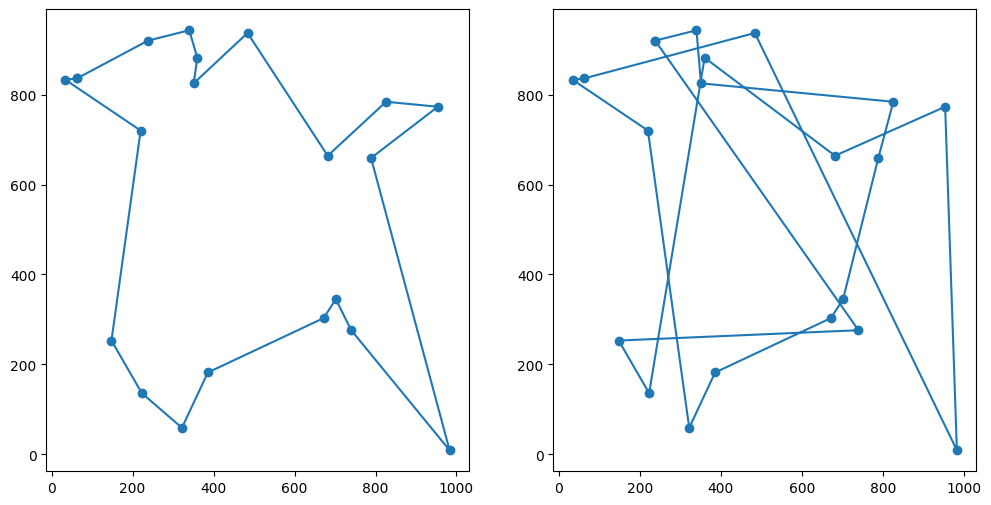

KeyboardInterrupt: 

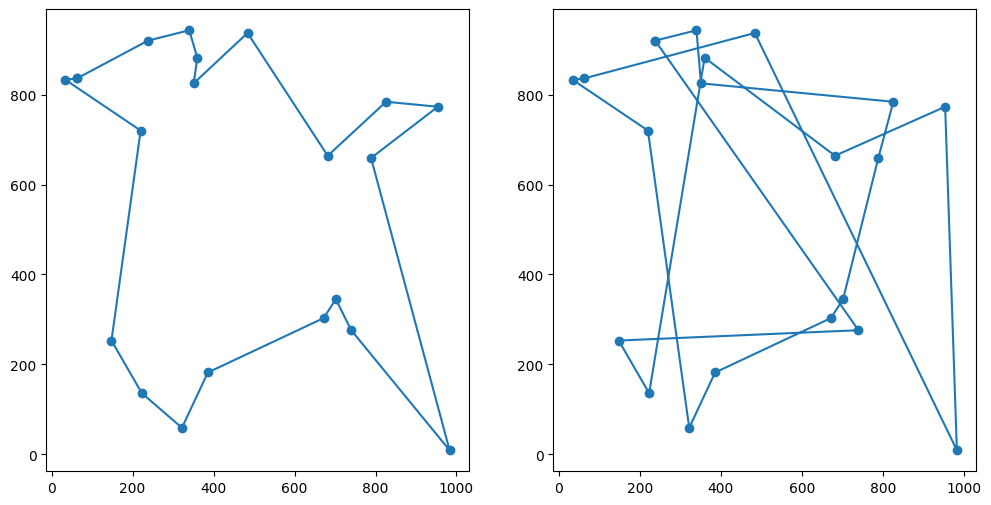

In [15]:
points = generate_random_points(20, 0, 1000)
compare(points)